### Data cleaning checklist
   - [Save original data](#Saving-original-data)
   - [Identifying missing data](#Identifying-missing-data)
   - [Identifying placeholder data](#Identifying-placeholder-data)
   - [Identifying outliers](#Identifying-outliers)
   - [Check for overall plausibility and errors:](#Check-for-overall-plausibility-and-errors)
       - [Observation](#Check-for-overall-plausibility-and-errors-Observation:)
   - [Identifying highly correlated variables](#Identifying-highly-correlated-variables)
   - [Identifying variables with (nearly) no variance](#Identifying-variables-with-nearly-no-variance)
       - [Observation](#Identifying-variables-with-nearly-no-variance-observation:)
   - [Identify variables with strange names or values](#Identify-variables-with-strange-names-or-values)
   - [Check variable classes](#Check-variable-classes)
   - [Remove/transform some variables](#Remove-or-transform-some-variables)
   - [Rename some variables or values](#Rename-some-variables-or-values)
   - [Check some overall pattern](#Check-some-overall-pattern)
   - [Exploratory Data Analysis](#Exploratory-Data-Analysis)
   - [Possibly center/scale variables](#Possibly-center/scale-variables)
  

In [2]:

import numpy as np # array manipulation
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  ## plotting graphs of the numeric columns
import seaborn as sns            ## drawing attractive statistical graphs
import collections               ##  for getting outliers
%matplotlib inline
df = pd.read_csv('kc_house_data.csv')
df.describe()                        ## Summary of the data (count, mean,std,max, etc)

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


###  The data set consist of housing details like price, year built, total square ft, square.ft living, basement square ft, year renovated, grade, condition, latitude and longitude. 
### The data is available for the property built between 1920 to 2015
### Analysis can be done on the data available of price of property on the basis of year built, its condition, square ft of living area, total square ft, etc.

## Data cleaning checklist

### Saving original data

In [3]:
import os
directory = './data/original'

# creating directory if doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)
    
# writing data into the file
df.to_csv('./data/original/kc_house_data.csv')

### Identifying missing data

In [4]:
df.get_dtype_counts()

float64     5
int64      16
object      1
dtype: int64

In [5]:
cols_with_missing = [col for col in df.columns 
                                 if df[col].isnull().any() or df[col].isna().any()]
print("missing value columns")
print(cols_with_missing)

missing value columns
[]


#### This means that the dataset does not have any missing values

### Identifying placeholder data

In [6]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Observation: It is kind of clear that value 0 in yr_renovated column is for placeholding.

### Identifying outliers

In [7]:
from collections import Counter, defaultdict
from collections import Counter
def outlierCounter(outlierDict, exceptionLst = ['price']):
    inter = Counter()
    name = collections.defaultdict(list)
    coreKey = set(outlierDict.keys()).difference(exceptionLst)
    for key in coreKey:
        value = outlierDict[key]
        for val in value:
            inter[val] += 1
            name[val].append(key)
    res = pd.DataFrame([inter, name], index = ['count', 'variable']).T
    res = res.sort_values('count', ascending = False)
    return res
from scipy.stats import multivariate_normal
def bivarCI(dfNum, y = 'price', outer = 10, z_score = 0.00006, cols = 2):
    
    colNum = dfNum.shape[1]
    row, col = divmod(colNum-1, cols)
    if row == 1 and col == 0: row += 1
    if col != 0: row += 1
    
    
    z_under = z_score * 0.98
    z_upper = z_score * 1.02
    
    biOutlier = dict().fromkeys(dfNum.columns, None)
    #f, axes = plt.subplots(row, cols, figsize = (4*cols, 4*row))
    #f.suptitle('Bivaraite CI', fontsize = 12)
    for ix, var1 in enumerate(dfNum.columns):
        if var1 == y: break
        r,c = divmod(ix, cols)
        dfPart = dfNum.loc[:, [var1,y]]
        dfPart = dfPart[~dfPart.isnull()].copy()
        dfPart = dfPart.loc[dfPart.loc[:, var1] != 0,:]
        dfPart = (dfPart - dfPart.mean()) / dfPart.std()
        F, X, Y, posProb = bivarConverter(dfPart, outer, z_under, z_upper, N = 700)
        #axes[r,c].contourf(X, Y, posProb)
        #axes[r,c].scatter(dfPart.loc[:, var1], dfPart.loc[:, y], alpha = 1)
        #axes[r,c].set_title('Bivaraite CI ' + var1)
        dfPartProb = F.pdf(dfPart.values)
        outIndex = dfPart.index[dfPartProb < z_score]
        biOutlier[var1] = set(outIndex.tolist())
    #f.tight_layout(rect = [0, 0.03, 1, 0.95])
    #plt.show()
    
    return biOutlier

def bivarConverter(df, outer, z_under, z_upper, N = 500):
    x_init, y_init = df.min() - outer
    x_end, y_end = df.max() + outer
    X = np.linspace(x_init, x_end, N)
    Y = np.linspace(y_init, y_end, N)
    X, Y = np.meshgrid(X, Y)
    pos = np.empty(X.shape + (2,))
    pos[:,:,0] = X
    pos[:,:,1] = Y
    F = multivariate_normal(mean=df.mean().values, cov=df.corr().values)
    posProb = F.pdf(pos)
    posProb[(z_under < posProb) & (posProb < z_upper)] = 1
    posProb[(z_under > posProb) | (posProb < z_upper)] = 0
       
    return F , X, Y, posProb

In [8]:
def outliers_z_score(ys):
    threshold = 4

    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
#     outSample = abs(df - df.mean()) > 4 * df.std()
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs([(y-mean_y) for y in ys]) > 4 * stdev_y)
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return upper_bound, np.where((ys > upper_bound) | (ys < lower_bound))

In [9]:
def detect_outliers(cols):
    biOutlier = bivarCI(df.loc[:, cols], outer = 2, z_score = 0.00006,  cols = 4)
    biOut = outlierCounter(biOutlier, ['price'])
    
    for outlier_type in cols:
        import math
        indices = [x[0] for x in biOut.iterrows() if not isinstance(x[1]['variable'], float) and outlier_type in x[1]['variable']]
        rows = [x[1] for x in biOut.iterrows()]
        outliers = [x[1][outlier_type] for x in df.iterrows() if x[0] in indices]
        print("")
        print("-",outlier_type)
        print("")
        print("Histogram of ",outlier_type, " whole data")
        plt.hist(df[outlier_type])
        plt.show()
        print("    Number of univariate outliers for ",outlier_type," ",len(outliers), " out of total ",len(df['price']))
        print("")
        print("Histogram of ",outlier_type, " outlier data. Detected with bivariate outlier detection method")
        plt.hist(outliers)
        plt.show()
        if len(outliers) > 0:
            print("    As shown in the histogram, all the data points of ",outlier_type, " above ",min(outliers)," is identified as outliers in bivariate method")
        iqr_upper, iqr_outliers = outliers_iqr(df[outlier_type])
        print()
        print("    Number of IQR outliers for ",outlier_type," ",len(iqr_outliers[0]), " out of total ",len(df['price']))
        print("")
        print("Boxplot of outlier detected with boxplot i.e. IQR method in ",outlier_type)
        sns.boxplot(y=outlier_type, data=df, fliersize=10)
        plt.show()
        print("    As shown in the histogram, all the data points of ",outlier_type, " above ",iqr_upper," is identified as outliers with IQR method")
        print("")
        print("")
        print("")

In [10]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


- sqft_living

Histogram of  sqft_living  whole data


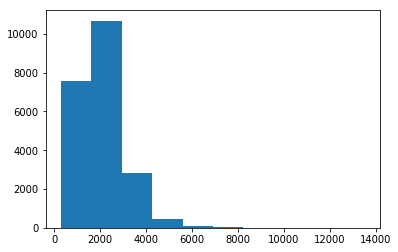

    Number of univariate outliers for  sqft_living   300  out of total  21613

Histogram of  sqft_living  outlier data. Detected with bivariate outlier detection method


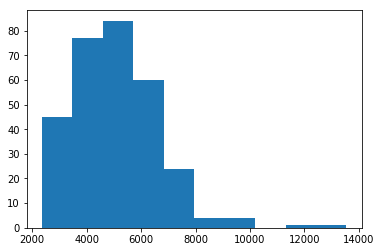

    As shown in the histogram, all the data points of  sqft_living  above  2360  is identified as outliers in bivariate method

    Number of IQR outliers for  sqft_living   572  out of total  21613

Boxplot of outlier detected with boxplot i.e. IQR method in  sqft_living


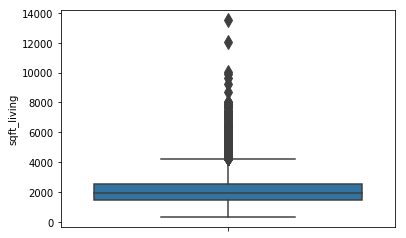

    As shown in the histogram, all the data points of  sqft_living  above  4234.5  is identified as outliers with IQR method




- sqft_lot

Histogram of  sqft_lot  whole data


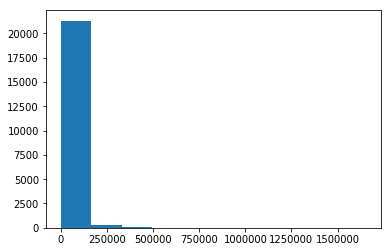

    Number of univariate outliers for  sqft_lot   507  out of total  21613

Histogram of  sqft_lot  outlier data. Detected with bivariate outlier detection method


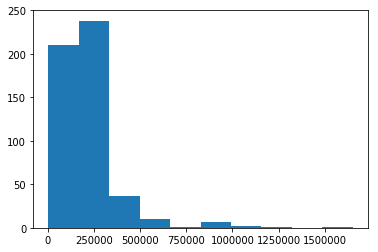

    As shown in the histogram, all the data points of  sqft_lot  above  3452  is identified as outliers in bivariate method

    Number of IQR outliers for  sqft_lot   2425  out of total  21613

Boxplot of outlier detected with boxplot i.e. IQR method in  sqft_lot


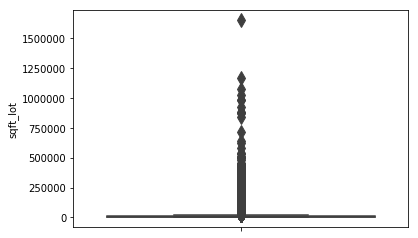

    As shown in the histogram, all the data points of  sqft_lot  above  19160.0  is identified as outliers with IQR method




- sqft_basement

Histogram of  sqft_basement  whole data


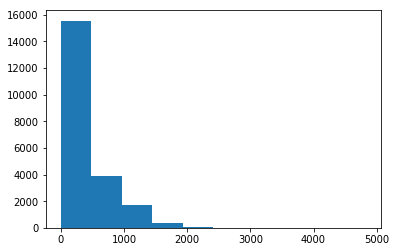

    Number of univariate outliers for  sqft_basement   126  out of total  21613

Histogram of  sqft_basement  outlier data. Detected with bivariate outlier detection method


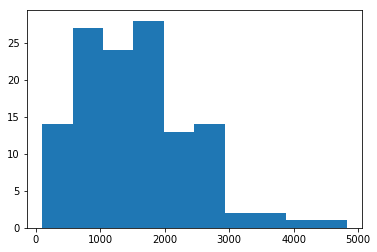

    As shown in the histogram, all the data points of  sqft_basement  above  100  is identified as outliers in bivariate method

    Number of IQR outliers for  sqft_basement   496  out of total  21613

Boxplot of outlier detected with boxplot i.e. IQR method in  sqft_basement


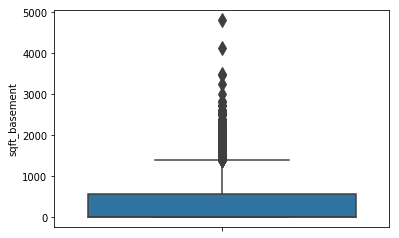

    As shown in the histogram, all the data points of  sqft_basement  above  1400.0  is identified as outliers with IQR method




- price

Histogram of  price  whole data


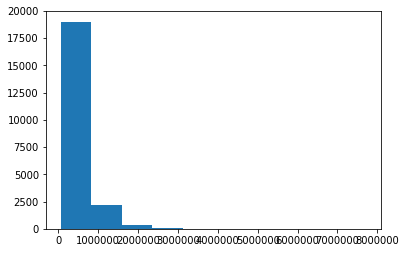

    Number of univariate outliers for  price   0  out of total  21613

Histogram of  price  outlier data. Detected with bivariate outlier detection method


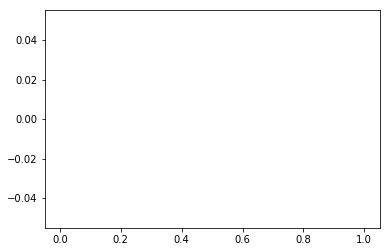


    Number of IQR outliers for  price   1146  out of total  21613

Boxplot of outlier detected with boxplot i.e. IQR method in  price


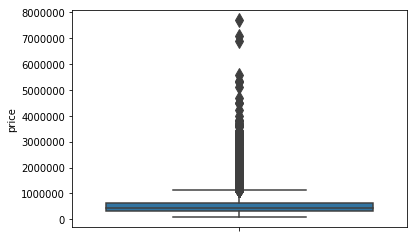

    As shown in the histogram, all the data points of  price  above  1129575.0  is identified as outliers with IQR method





In [172]:
cols = ['sqft_living','sqft_lot', 'sqft_basement', 'price']
detect_outliers(cols)

### Check for overall plausibility and errors

In [12]:
# Checking date values
print(df['date'].head())
type(df['date'][0])

0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
Name: date, dtype: object


str

As clear as it can be, we can easily convert the given datetime format into python's date time format. As demonstrated below. So there is no problem with this column.

In [80]:
from datetime import datetime

datetime_object = datetime.strptime('20141013T000000', '%Y%m%dT000000')
datetime_object
 ## df['date'] = df.date.apply(lambda x: pd.to_datetime(x).strftime('%m/%d/%Y')[0])

datetime.datetime(2014, 10, 13, 0, 0)

In [14]:
# Checking price values has any negative or 0 value
print("0 or negative values for price")
print(sum(df['price']<=0))

0 or negative values for price
0


In [15]:
# Checking bedrooms values
print("Bedrooms unique values")
df['bedrooms'].unique()

Bedrooms unique values


array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

In [16]:
# Checking bathrooms values
print("Bathrooms unique values")
df['bathrooms'].unique()

Bathrooms unique values


array([ 1.  ,  2.25,  3.  ,  2.  ,  4.5 ,  1.5 ,  2.5 ,  1.75,  2.75,
        3.25,  4.  ,  3.5 ,  0.75,  4.75,  5.  ,  4.25,  3.75,  0.  ,
        1.25,  5.25,  6.  ,  0.5 ,  5.5 ,  6.75,  5.75,  8.  ,  7.5 ,
        7.75,  6.25,  6.5 ])

In [17]:
# Checking sq. feet living values has any negative or 0 value
print("0 or negative values for Sq feet living")
print(sum(df['sqft_living']<=0))

0 or negative values for Sq feet living
0


In [18]:
# Checking sq. feet lot values has any negative or 0 value
print("0 or negative values for Sq feet Lot")
print(sum(df['sqft_lot']<=0))

0 or negative values for Sq feet Lot
0


In [19]:
# Checking sq. feet values has any negative or 0 value
print("0 or negative values for floor")
print(sum(df['floors']<=0))

0 or negative values for floor
0


In [20]:
# Checking values of waterfront, should be either 0 or 1
df['waterfront'].unique()

array([0, 1], dtype=int64)

In [21]:
# Checking values of view. should contain only positive numbers
print(df['view'].unique())
print("negative values for view")
print(sum(df['floors']<0))

[0 3 4 2 1]
negative values for view
0


In [22]:
# Checking overall condition of house. Will contain rating
df['condition'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [23]:
# Checking grade values
df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1], dtype=int64)

In [24]:
# Checking sq feet above. Sq feet apart from basement
print("negative or 0 values for sq feet above")
print(sum(df['sqft_above']<=0))

negative or 0 values for sq feet above
0


In [25]:
# Checking sq feet above. Sq feet apart from basement
print("negative values for sq feet basement")
print(sum(df['sqft_basement']<0))

negative values for sq feet basement
0


In [26]:
# checking year built
df['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935], dtype=int64)

In [27]:
# checking year renovated
df['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)

Year renovated holds the value 0. Which indicates that it is a placeholder value and the house is never been renovated.

In [28]:
# checking zipcode values
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

In [29]:
# checking lat values
print("0 values for lat")
print(sum(df['lat']==0))
df['lat'].unique()

0 values for lat
0


array([ 47.5112,  47.721 ,  47.7379, ...,  47.3906,  47.3339,  47.6502])

In [30]:
# checking long values
print("0 values for long")
print(sum(df['long']==0))

0 values for long
0


In [31]:
# checking sq feet living15, Living room area in 2015(implies-- some renovations)
#This might or might not have affected the lotsize area
print("0 and negative values for sqft living15")
print(sum(df['sqft_living15']<=0))

0 and negative values for sqft living15
0


In [32]:
# checking sq feet living15, lotSize area in 2015(implies-- some renovations)
print("0 and negative values for sqft lot 15")
print(sum(df['sqft_lot15']<=0))

0 and negative values for sqft lot 15
0


In [33]:
# Checking view values
df['view'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

### check if there is any duplicated row

In [34]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
21583    False
21584    False
21585    False
21586    False
21587    False
21588    False
21589    False
21590    False
21591    False
21592    False
21593    False
21594    False
21595    False
21596    False
21597    False
21598    False
21599    False
21600    False
21601    False
21602    False
21603    False
21604    False
21605    False
21606    False
21607    False
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

##### Check for overall plausibility and errors Observation:
There is no missing data in dataset. There are no inappropriate values observed in dataset. The dataset seems to be logical and valid.

### Identifying highly correlated variables

In [35]:
df.corr()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
Unnamed: 0,1.000000,0.006718,0.027372,0.010794,0.107334,0.044717,-0.026877,0.179138,-0.007611,-0.013751,...,0.082050,0.071958,-0.041841,0.199549,-0.025601,-0.002199,0.000701,0.008649,0.026647,-0.029827
id,0.006718,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,...,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,0.027372,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,...,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.010794,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,...,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.107334,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,...,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.044717,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,...,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.026877,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,...,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.179138,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,...,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.007611,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,...,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,-0.013751,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,...,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575


In [36]:
correlations = [[(index1, index2) for index2, column in row.iteritems() if column>0.6 and index1 != index2] 
 for index1, row in df.corr().iterrows()]
print("List of highly correlated variables:")
print()
for correlation in correlations:
    for item in correlation:
        print(item[0]," and ",item[1])

List of highly correlated variables:

price  and  sqft_living
price  and  grade
price  and  sqft_above
bathrooms  and  sqft_living
bathrooms  and  grade
bathrooms  and  sqft_above
sqft_living  and  price
sqft_living  and  bathrooms
sqft_living  and  grade
sqft_living  and  sqft_above
sqft_living  and  sqft_living15
sqft_lot  and  sqft_lot15
grade  and  price
grade  and  bathrooms
grade  and  sqft_living
grade  and  sqft_above
grade  and  sqft_living15
sqft_above  and  price
sqft_above  and  bathrooms
sqft_above  and  sqft_living
sqft_above  and  grade
sqft_above  and  sqft_living15
sqft_living15  and  sqft_living
sqft_living15  and  grade
sqft_living15  and  sqft_above
sqft_lot15  and  sqft_lot


### Identifying variables with nearly no variance

In [37]:
print (np.var(df))

Unnamed: 0       3.892681e+07
id               8.274247e+18
price            1.347761e+11
bedrooms         8.649750e-01
bathrooms        5.931238e-01
sqft_living      8.434947e+05
sqft_lot         1.715579e+09
floors           2.915745e-01
waterfront       7.484879e-03
view             5.872154e-01
condition        4.234469e-01
grade            1.381639e+00
sqft_above       6.857029e+05
sqft_basement    1.958636e+05
yr_built         8.627573e+02
yr_renovated     1.613387e+05
zipcode          2.862655e+03
lat              1.919901e-02
long             1.983170e-02
sqft_living15    4.697395e+05
sqft_lot15       7.454837e+08
dtype: float64


#### Identifying variables with nearly no variance observation:

Above data shows that waterfront has lowest of variance and lat, long holds second and third positions respectively.

### Identify variables with strange names or values

There are no variables with strage name or values.

### Check variable classes

NA

### Remove or transform some variables

 Date is formatted in proper python format

### Rename some variables or values

No values in the data set are to be renamed.

### Check some overall pattern

In [81]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Possibly center/scale variables

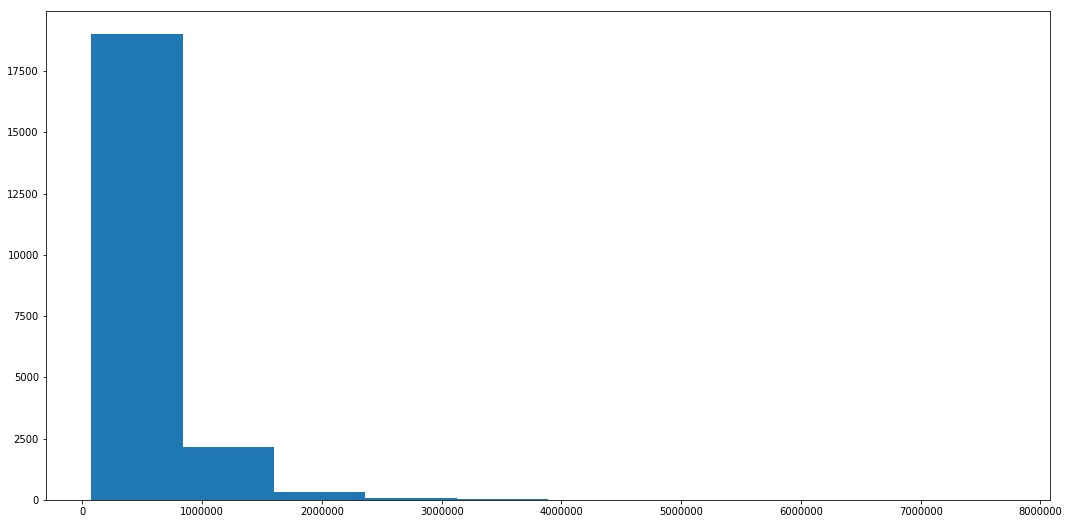

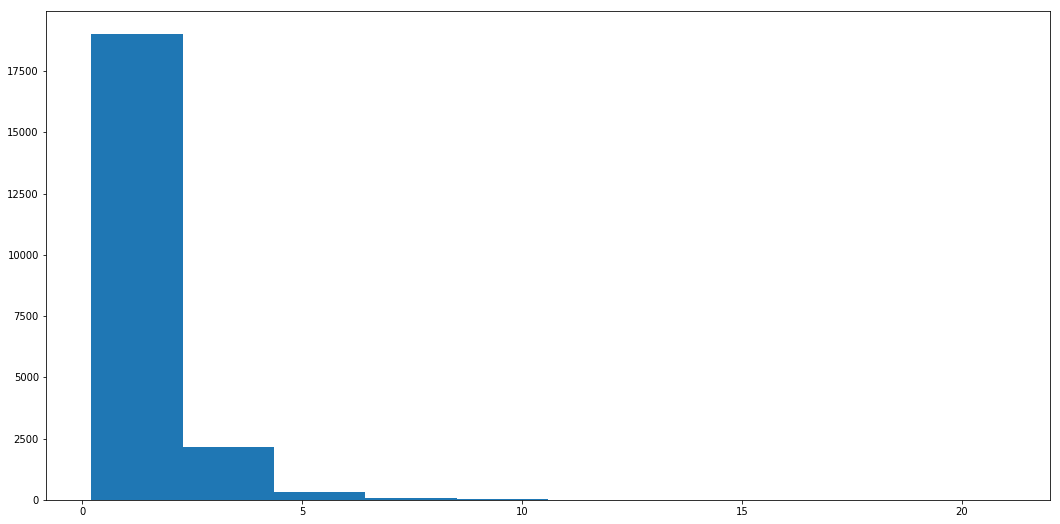

In [82]:
import sklearn
from sklearn.preprocessing import scale
plt.hist(df['price'])
plt.show()
plt.hist(scale(df['price'], with_mean=False, with_std=True))
plt.show()

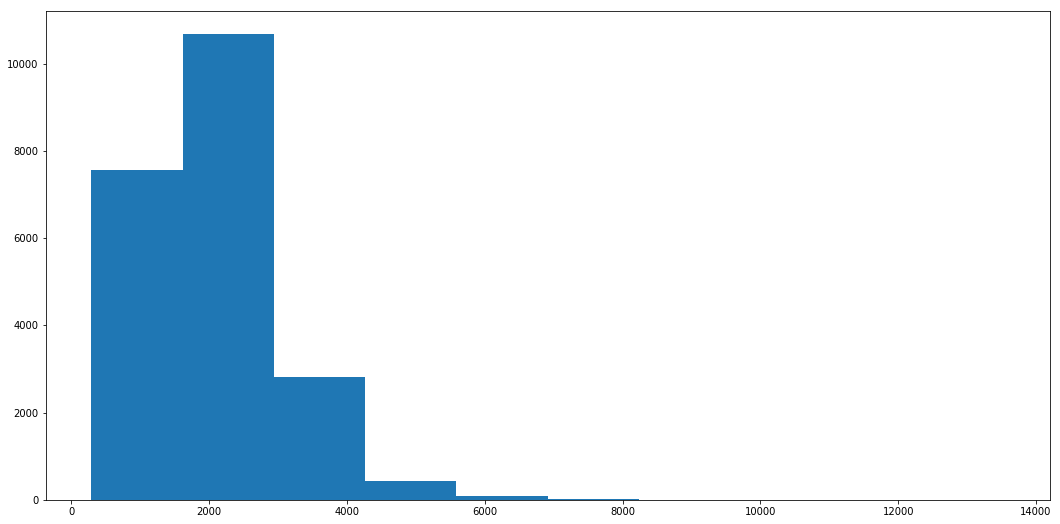

e:\python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


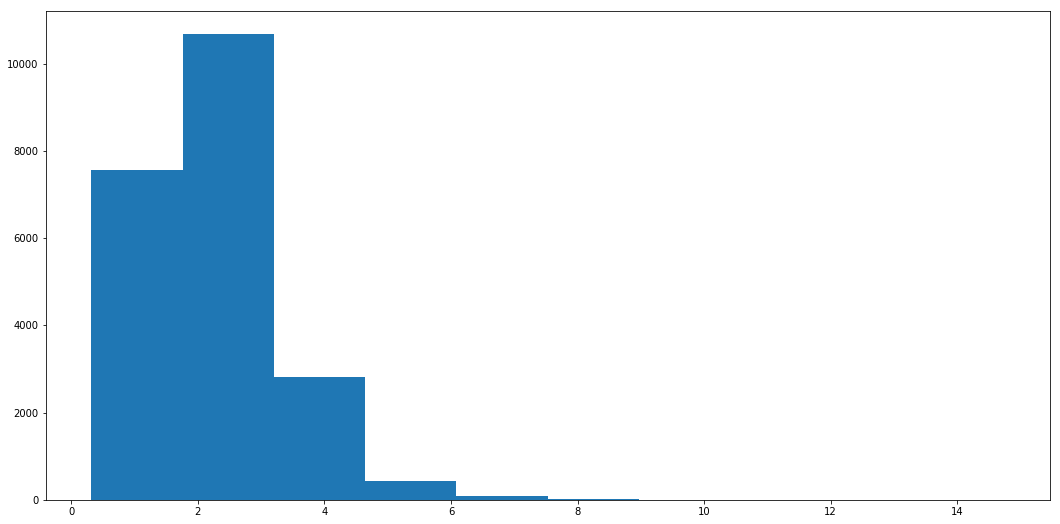

In [88]:
plt.hist(df['sqft_living'])
plt.show()
plt.hist(scale(df['sqft_living'], with_mean=False, with_std=True))
plt.show()

### Exploratory Data Analysis

In [179]:
# Make plots larger
plt.rcParams['figure.figsize'] = (18, 9)

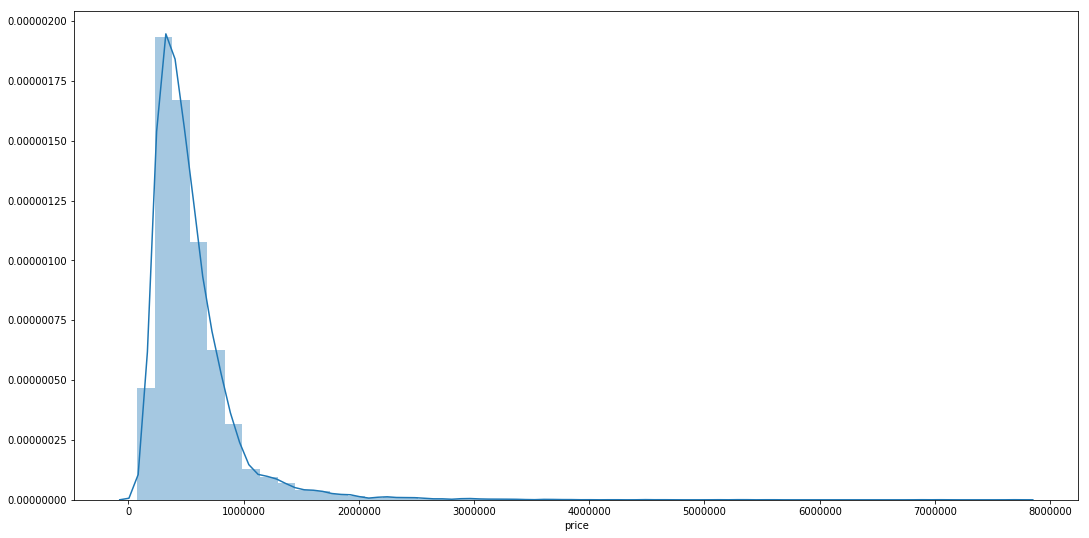

In [180]:
sns.distplot(df['price'],kde= True)

### The above graph is not normally distributed. 

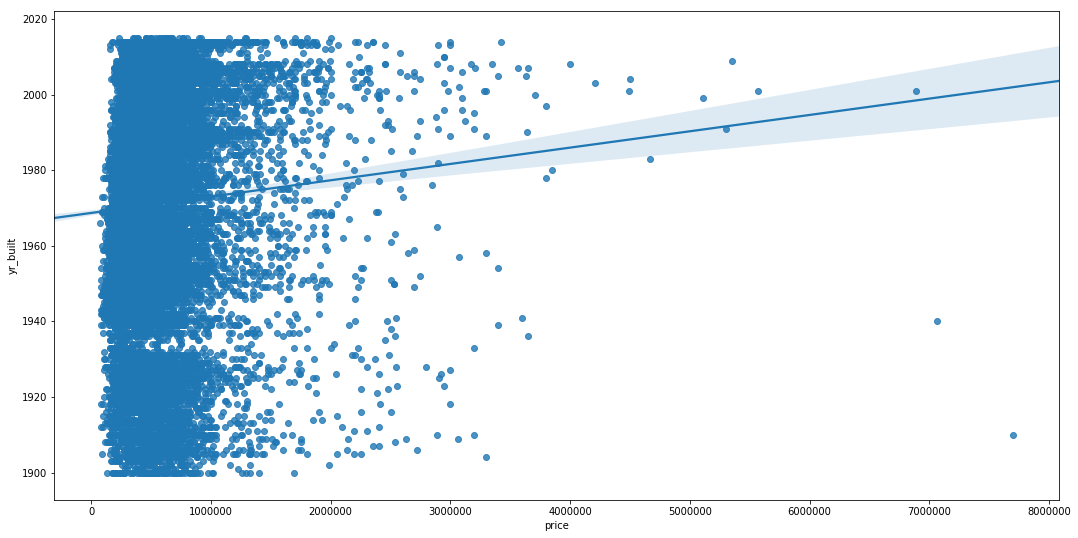

In [181]:
sns.regplot(x = 'price',y='yr_built',data = df,scatter = True)

### Scatter plot of data on the basis of property built in a year and its price

### Shows the resulting regression line between price and year built.
### The plot shows that the property built in 1910 and 1940 with price approx 700000 are outliers.


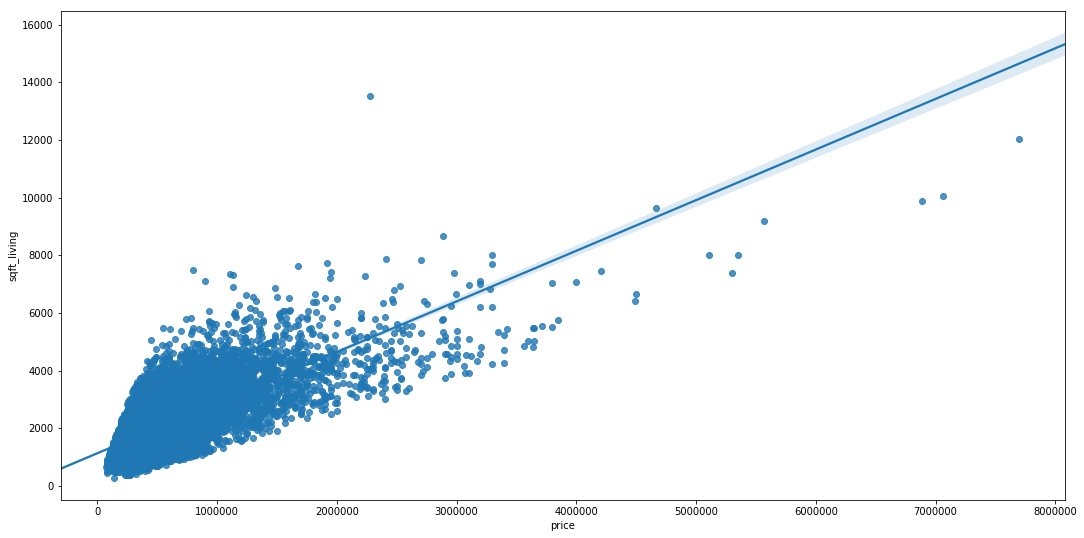

In [182]:
sns.regplot(x = 'price',y='sqft_living',data = df,scatter = True)

### Scatter plot of data on the basis of sq.ft of property and its price
### Shows the resulting regression line between price and area.
### The plot shows that the 90% of the property have price between 1000 to 2000000 with square feet 500 to 4000.

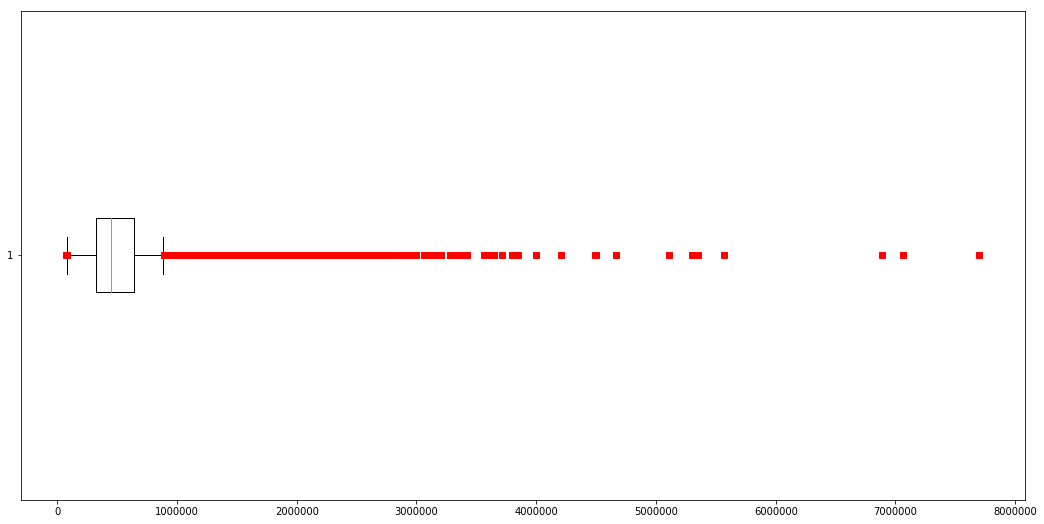

In [183]:
plt_box_v = plt.boxplot(df['price'], 0,'rs', 0, 0.75)   ## whisker length is 0.75

###  This boxplot of price shows the mean, first quartile and third quartile.
###  Price above 7000000 are outliers

                 price  yr_renovated  yr_built  sqft_living  sqft_lot  \
price         1.000000      0.126434  0.054012     0.702035  0.089661   
yr_renovated  0.126434      1.000000 -0.224874     0.055363  0.007644   
yr_built      0.054012     -0.224874  1.000000     0.318049  0.053080   
sqft_living   0.702035      0.055363  0.318049     1.000000  0.172826   
sqft_lot      0.089661      0.007644  0.053080     0.172826  1.000000   
grade         0.667434      0.014414  0.446963     0.762704  0.113621   

                 grade  
price         0.667434  
yr_renovated  0.014414  
yr_built      0.446963  
sqft_living   0.762704  
sqft_lot      0.113621  
grade         1.000000  


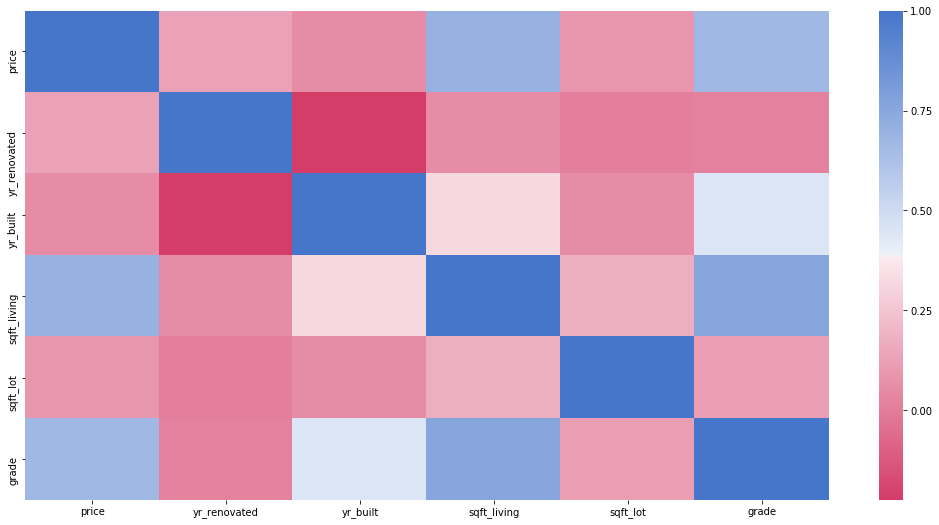

In [184]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)

correlations = df[['price', 'yr_renovated', 'yr_built', 'sqft_living','sqft_lot','grade']].corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)

### The above graph shows correlation between  price, yr_renovated, yr_built, sqft_living, sqft_lot , grade. Correlation between yr_built and price, price and sqft living is high.

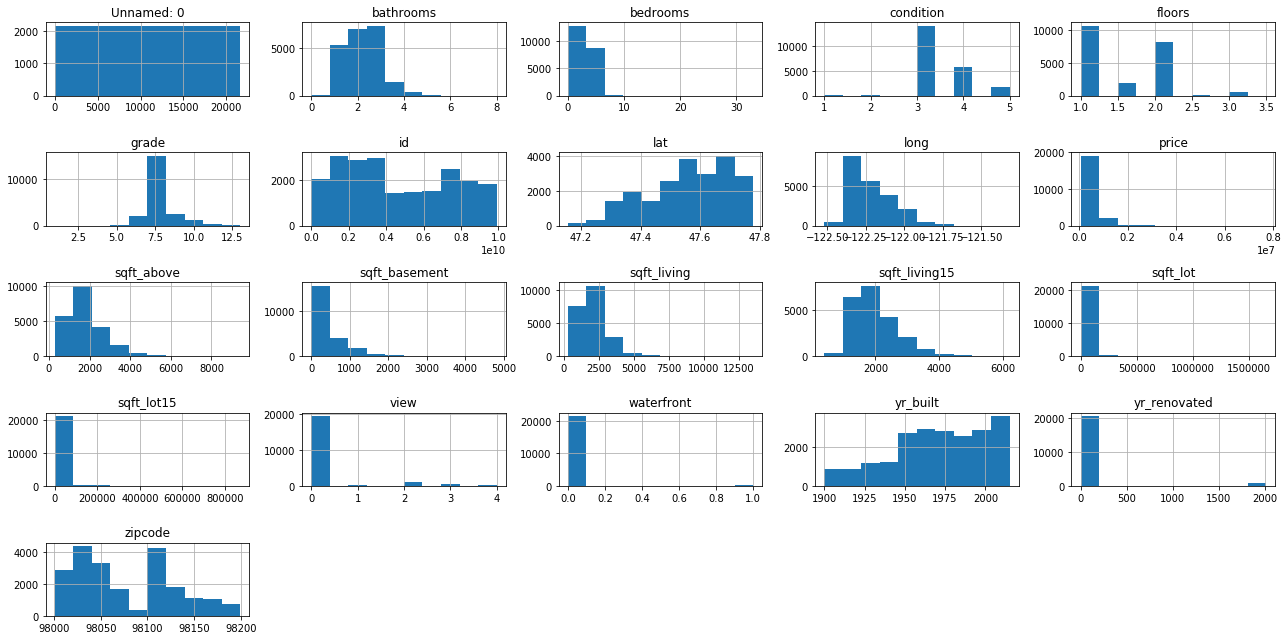

In [185]:
df.hist()
plt.tight_layout()
plt.show()
 

###  Above analysis shows histogram of each numeric column of dataset.
###  For example the grade of 95% of housing property  is between 6 to 8

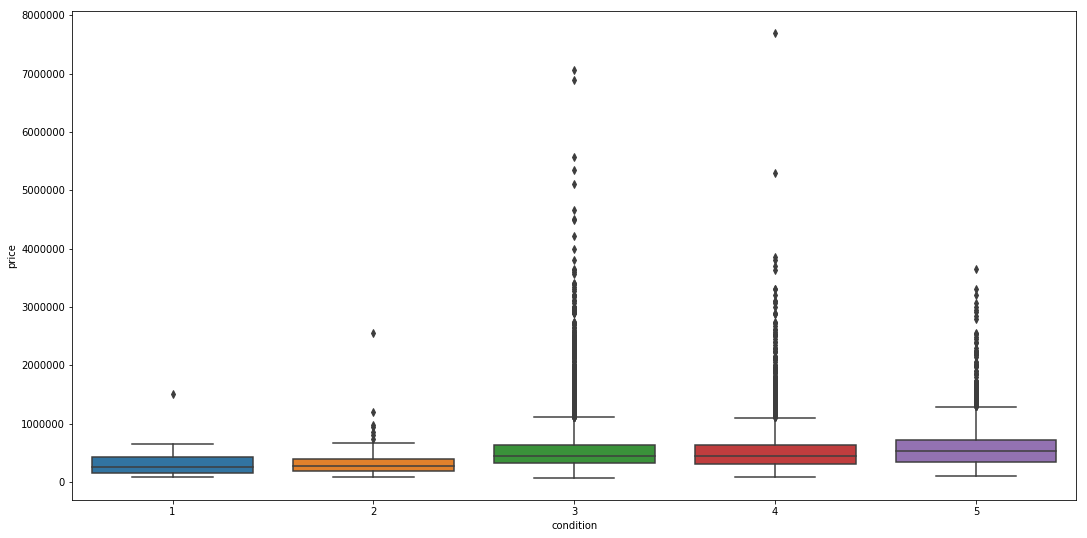

In [186]:
sns.boxplot(x="condition",y="price",data=df)

### Above is the box plot of dataset according to condition level of the property. 
### Property with condition level 4 has more price than any other data set.

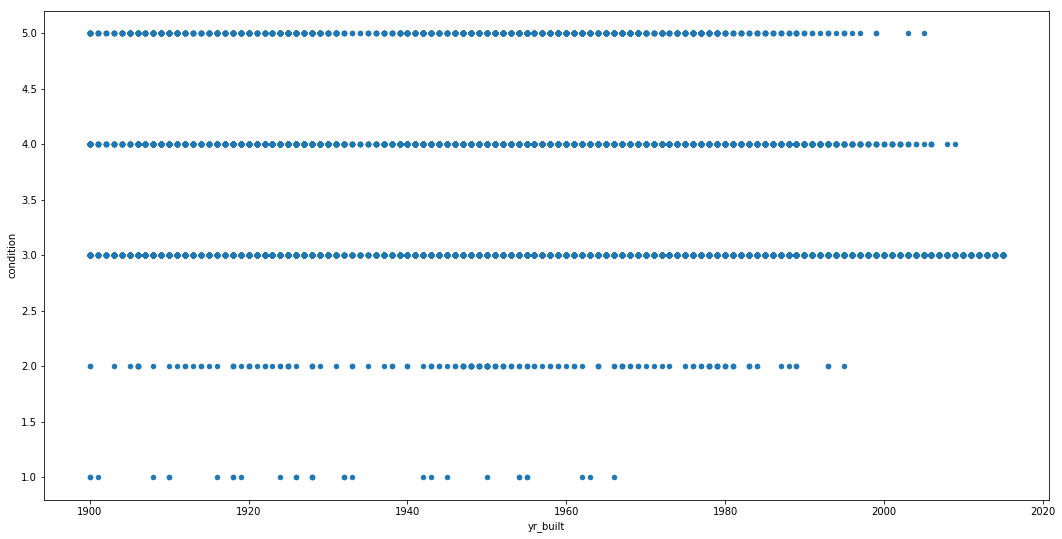

In [187]:
## sns.barplot(x="condition",y="yr_built",data=df)
df.plot.scatter(x= 'yr_built',y = 'condition')

### Above Scatterplot shows that property built after 1995 has received condition rating of 3 or more than 3.
### condition rating having value 3 are the properties built before 1995 with 90% of the property receiving rating 2.

In [188]:
groupBy_year = df['yr_built']

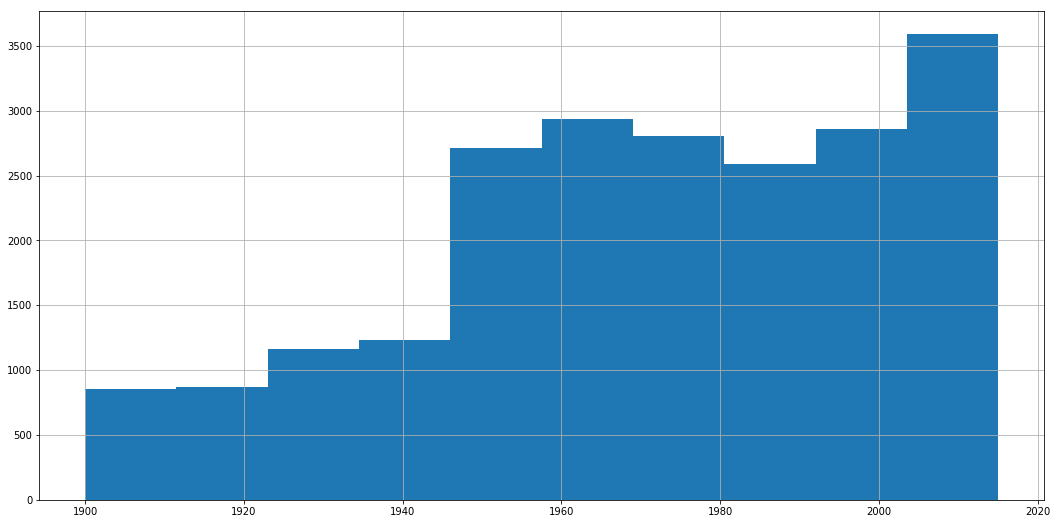

In [189]:
groupBy_year.hist()

###  The above graph shows the number of properties built which are grouped by year.
###   Histogram shows that building of properties increases sharply after 1940

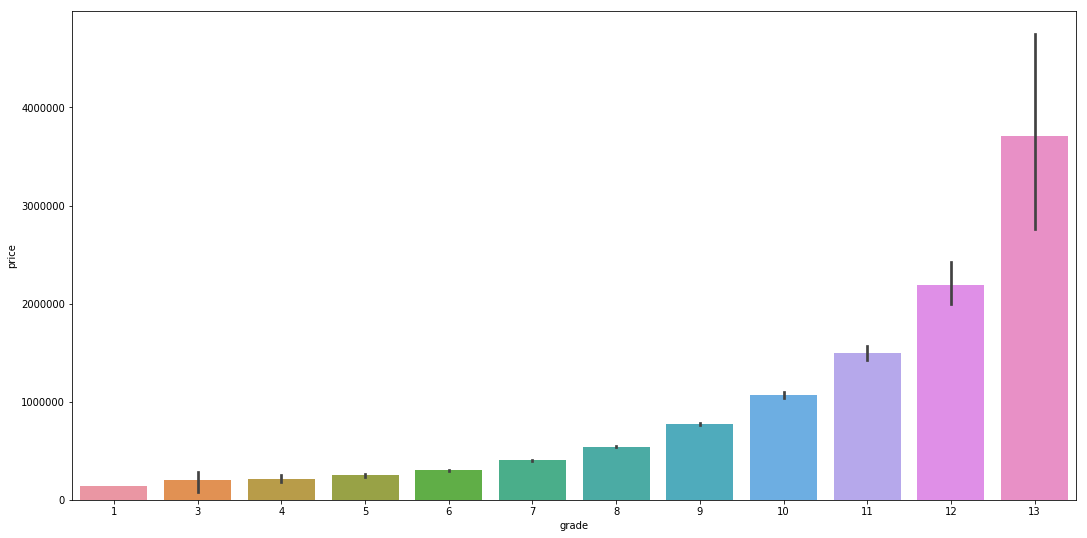

In [190]:
sns.barplot(y="price",x="grade", data=df)
plt.show()
plt.figure(figsize=(35,10))

### Above bar plot shows that the property with higher grade has higher price.

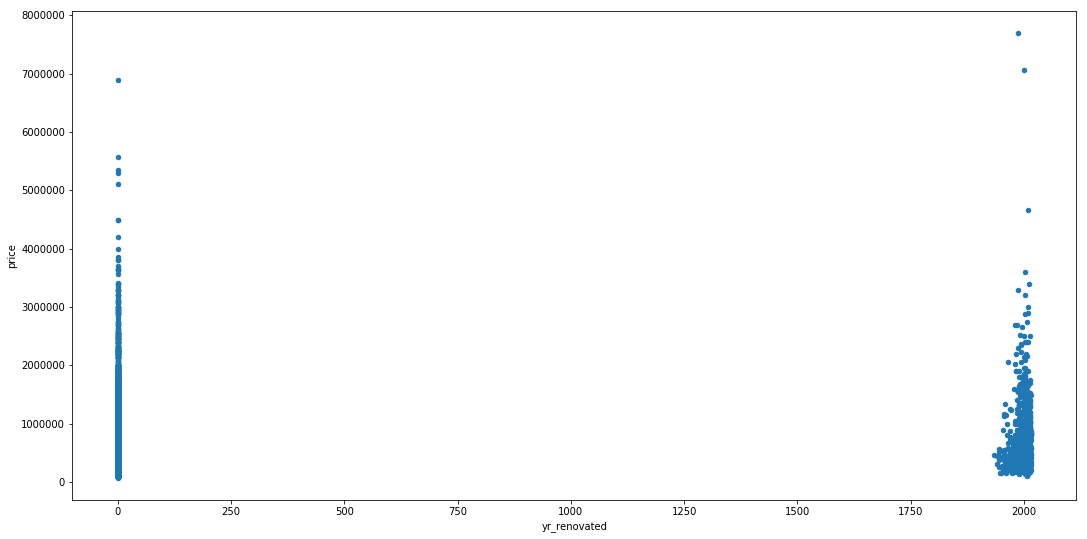

In [191]:
df.plot.scatter(x= 'yr_renovated',y = 'price')

The above scatter plot shows that all the properties are renovated within 1980 to 2010 and 95% of property with price less than 1000000 are  renovated.

In [192]:
grouping_pivot = pd.pivot_table(df, values='price', index='yr_built',columns=['condition'], aggfunc = np.mean)

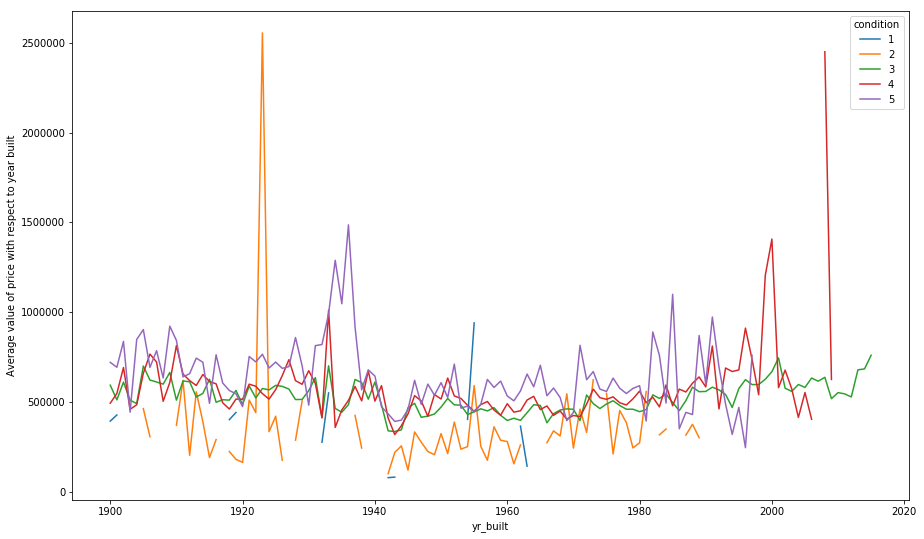

In [193]:
plt.figure(figsize=(25,10))
grouping_pivot.plot(kind= 'line',figsize = (15,9))
plt.ylabel('Average value of price with respect to year built');
# plt.plot(grouping_pivot)
# plt.legends(condition)

### The above plot shows that average price of property is lowest between year 1940 to 1960 and highest between 1920 to 1925 and 2005 to 2010

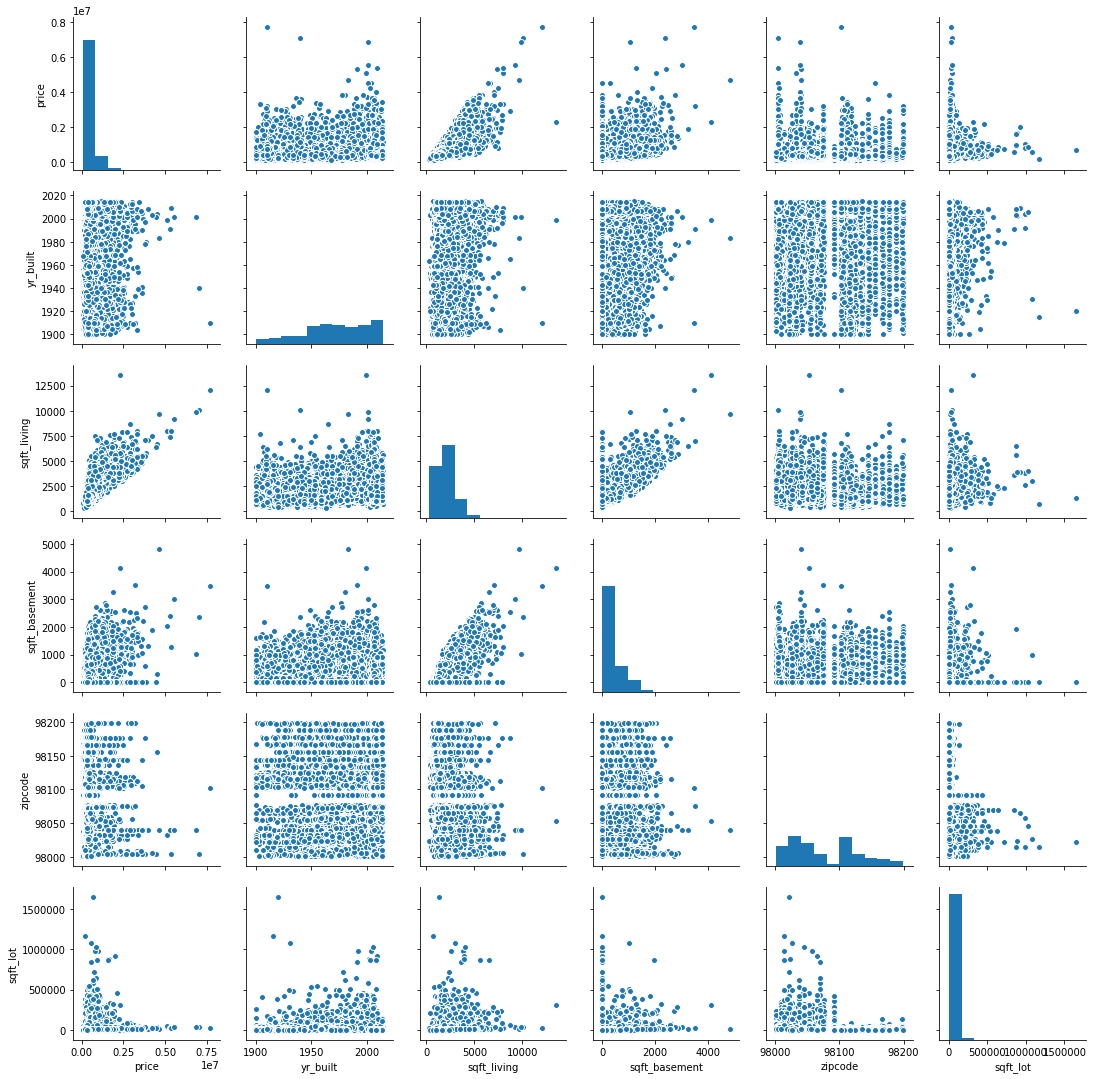

In [5]:
sns.pairplot(df, vars = ['price','yr_built','sqft_living','sqft_basement','zipcode','sqft_lot'])

###  The Above pair plot shows the distribution of price, yr_built, sqft_lot, sqft_living, zipcode, sqft_basement.
#### It shows that outliers are very few in year built v/s price, zipcode v/s sqft_living, yr_built v/s zipcode and price v/s zipcode.

### Summary :
The Data consist of housing details like price, yr_built, condition, etc
Exploratory Data Analysis is done on the basis of the available data like yr_built,price, condition, grade, yr_renovated and sqft_living.

There are Histograms, boxplot, line plot, bar plot and scatter plot to analysis the statistical behavior of data.

Outliers are also detected in the data and graph by grouping year is also visualized to get the average price of properties in a particular year according to the condition rating.

Moreover analysis and prediction can be done using Trees, Clustering or other techniques.